# Tensorflow cifar10 example
https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce

In [59]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
import keras
import numpy as np
# Convert the LABELS 0..9 to one-hot
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

# Convert the IMAGE pixels 0.255 to 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
print("x_train.shape:",x_train.shape)
print("y_test_one_hot.shape",y_test_one_hot.shape)

x_train.shape: (50000, 32, 32, 3)
y_test_one_hot.shape (10000, 10)


In [69]:
classes = ["AIRPLANE","AUTOMOBILE","BIRD","CAT","DEER","DOG","FROG","HORSE","SHIP","TRUCK"]
# general purpose function to convert class 0..9 to a name string
def label(n):
    return classes[n]

In [70]:
# general purpose function to display the neural network output as a bar chart
def print_logits(logits):
    index = np.arange(len(logits))
    plt.bar(index, logits, align='center', alpha=0.5)
    plt.xlabel('Classification')
    plt.ylabel('Logits')
    plt.xticks(index,classes,rotation=90)
    plt.title('Neutral network confidence')
    plt.show()


Selected image x_train[0]
y_train[0] = [6] = FROG = (one-hot) [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000]


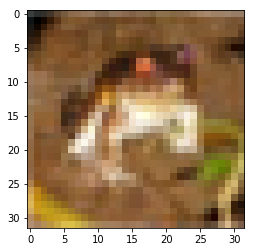

In [71]:
image_index = 0 # index into training images. Anything up to 50,000

print("Selected image x_train[{0}]".format(image_index))
print("y_train[{0}] = {1} = {2} = (one-hot) {3}".format(image_index,y_train[image_index],label(y_train[image_index][0]),y_train_one_hot[0]))
plt.imshow(x_train[image_index])

In [72]:
print("x_train: ",x_train.shape,"y_train: ",y_train.shape)

x_train:  (50000, 32, 32, 3) y_train:  (50000, 1)


In [73]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [74]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

In [75]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train_one_hot, batch_size=32, epochs=20, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 90s 2ms/sample - loss: 1.5212 - accuracy: 0.4478 - val_loss: 1.1709 - val_accuracy: 0.5783
Epoch 2/20
40000/40000 [==============================] - 92s 2ms/sample - loss: 1.1110 - accuracy: 0.6053 - val_loss: 0.9676 - val_accuracy: 0.6668
Epoch 3/20
40000/40000 [==============================] - 91s 2ms/sample - loss: 0.9552 - accuracy: 0.6626 - val_loss: 0.8360 - val_accuracy: 0.7068
Epoch 4/20
40000/40000 [==============================] - 91s 2ms/sample - loss: 0.8641 - accuracy: 0.6949 - val_loss: 0.7863 - val_accuracy: 0.7248
Epoch 5/20
40000/40000 [==============================] - 101s 3ms/sample - loss: 0.7802 - accuracy: 0.7253 - val_loss: 0.7482 - val_accuracy: 0.7417
Epoch 6/20
40000/40000 [==============================] - 99s 2ms/sample - loss: 0.7240 - accuracy: 0.7441 - val_loss: 0.7397 - val_accuracy: 0.7487
Epoch 7/20
40000/40000 [==============================]

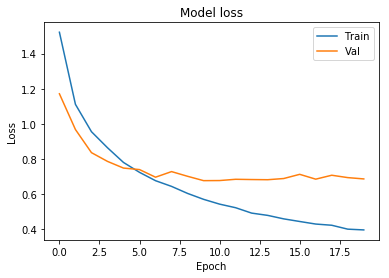

In [76]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

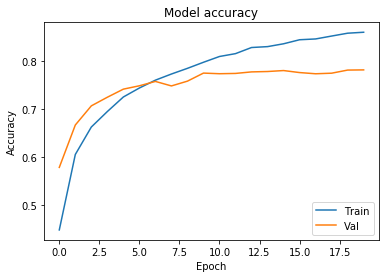

In [77]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [78]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 457us/sample - loss: 0.7036 - accuracy: 0.7817


0.7817

In [79]:
cat = plt.imread("cat.png")

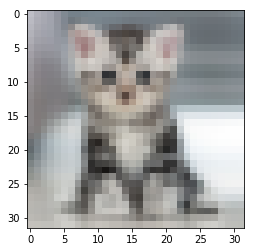

In [80]:
from skimage.transform import resize
cat_resized = resize(cat, (32,32,3))
plt.imshow(cat_resized)

In [81]:
cat_prob = model.predict(np.array( [cat_resized,] ))
# set default print to 3 decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(cat_prob)

[[0.000 0.000 0.000 0.026 0.000 0.136 0.000 0.837 0.000 0.000]]


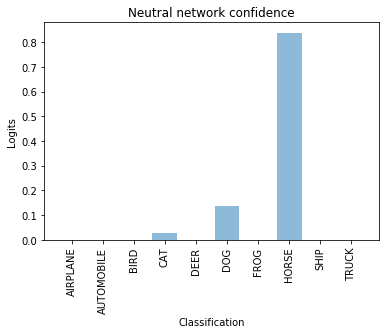

In [82]:
print_logits(cat_prob[0])

## Predict a variety of images from the test data

In [103]:
image_index = 0
print(classes)

['AIRPLANE', 'AUTOMOBILE', 'BIRD', 'CAT', 'DEER', 'DOG', 'FROG', 'HORSE', 'SHIP', 'TRUCK']


[0.000 0.000 0.028 0.226 0.329 0.284 0.032 0.101 0.000 0.000] 4
Index 12 Category: DEER Label: DOG


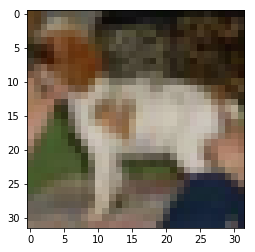

In [115]:
image_index += 1
plt.imshow(x_test[image_index])
pred = model.predict(np.array([x_test[image_index],]))
print(pred[0], pred[0].argmax())
predict_label = classes[pred[0].argmax()]
correct_label = classes[y_test[image_index][0]]
print('Index {0} Category: {1} Label: {2}'.format(image_index, predict_label, correct_label))

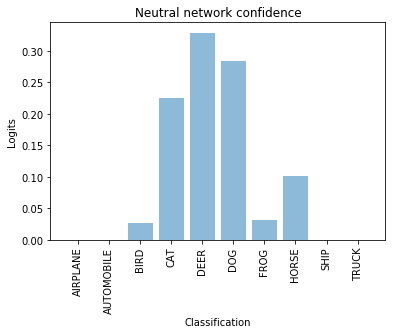

In [116]:
print_logits(pred[0])